##**Deep learning LAB1 assignment**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##All Essential Imports

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline
import h5py 
from torch.utils.data import DataLoader


##**STEP 1**: Open MNISTdata.*hdf5* in read mode and read image and corresponding labels

In [3]:
MNIST_data = h5py.File('/content/drive/MyDrive/Deep_Learn_LAB/Lab_assignments/LAB_1/MNISTdata.hdf5', 'r')

data_img = MNIST_data.get('input')               
data_lbl = MNIST_data.get('output')
##MNIST_data.keys()


data_img = torch.tensor(data_img) 
data_img = torch.div(data_img, 255)
data_lbl = torch.tensor(data_lbl)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  


##Questions related to Step-1:

In [4]:
def split_data(data, m, n):
  x , y = data.split(int(m*2000), dim = 0)
  return x, y


In [5]:
##(A)Split the dataset into two parts as training data and testing data with the ratio 70 : 30.
train_img, test_img   = split_data(data_img, 0.7, 0.3)
train_lbl, test_lbl   = split_data(data_lbl, 0.7, 0.3)


##• Print the input and the output sizes of the training and the testing dataset.
print('Input images and output labels size of Training set respectively:', train_img.shape, train_lbl.shape)
print('\nInput images and output labels size of Testing set respectively:', test_img.shape, test_lbl.shape)

Input images and output labels size of Training set respectively: torch.Size([1400, 28, 28, 1]) torch.Size([1400, 1])

Input images and output labels size of Testing set respectively: torch.Size([600, 28, 28, 1]) torch.Size([600, 1])


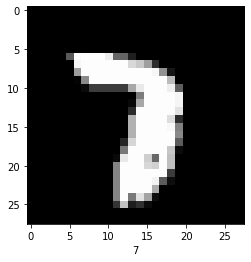

In [6]:
##• Plot first 5 test images and provide the true label as the caption for each test image
image = test_img[0]
plot.xlabel(int(test_lbl[0]))
plot.imshow(image[:,:,0], cmap = 'gray')

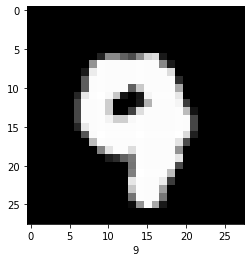

In [7]:
## 2nd image
image = test_img[1]
plot.xlabel(int(test_lbl[1]))
plot.imshow(image[:,:,0], cmap = 'gray')


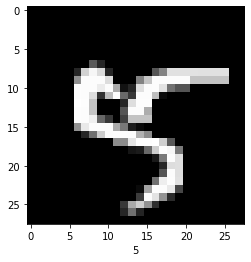

In [8]:
## 3rd image
image = test_img[2]
plot.xlabel(int(test_lbl[2]))
plot.imshow(image[:,:,0], cmap = 'gray')


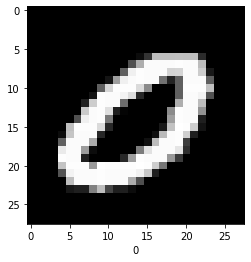

In [ ]:
## 4th image
image = test_img[3]
plot.xlabel(int(test_lbl[3]))
plot.imshow(image[:,:,0], cmap = 'gray')


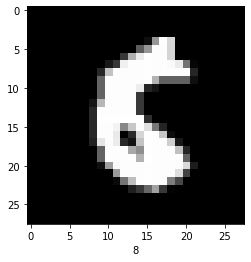

In [ ]:
## 5th image
image = test_img[4]
plot.xlabel(int(test_lbl[4]))
plot.imshow(image[:,:,0], cmap = 'gray')


In [32]:
##(B) Flatten the training and the testing dataset by reshaping the images into a single vector for each 
##    data. Print the input and the output shape of the training and the testing dataset.

flat_train_img = train_img.reshape(1400, -1)
flat_test_img = test_img.reshape(600, -1)
print('Input images and output labels size of flat vector Training set respectively:', flat_train_img.shape, train_lbl.shape)
print('\nInput images and output labels size of flat vector Testing set respectively:', flat_test_img.shape, test_lbl.shape)



Input images and output labels size of flat vector Training set respectively: torch.Size([1400, 784]) torch.Size([1400, 1])

Input images and output labels size of flat vector Testing set respectively: torch.Size([600, 784]) torch.Size([600, 1])


In [ ]:
##(C) Create DataLoaders that can be iteratively fed to a neural network for training and testing.
##    Use batch size as 64


def make_data_loader(dataset, batch_size):
  dataset_loader = DataLoader(dataset, batch_size, shuffle = False)
  return dataset_loader
  

##**STEP 1**: All models
##1)Model-configuration – 1: Build a 1-hidden layer network with 50 hidden units.


In [51]:
import torch.nn as nn
input_size = 28*28
num_classes = 10


class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  
  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out


model = MnistModel()



In [171]:
loader1 = make_data_loader(train_img, 100)
loader2 = make_data_loader(train_lbl, 100)

for image in loader1:
  y = model(image)
  print(y.shape)
  #print(y)
  break

for label in loader2:
  lbl = label
  lbl = torch.squeeze(lbl)
  print(lbl.shape)
  print(lbl)
  break

torch.Size([100, 10])
torch.Size([100])
tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1])


In [148]:
#implement the softmax activation function.

import torch.nn.functional as function
output_prob = function.softmax(y, dim = 1 )
#print(output_prob)
#print(torch.sum(output_prob[4]).item())

In [152]:
max, pred = torch.max(output_prob, dim = 1)
#print(max)
print(pred)
#print(train_lbl[:5])

tensor([0, 8, 9, 1, 9, 1, 1, 1, 9, 2, 1, 1, 1, 0, 1, 0, 8, 1, 2, 7, 9, 1, 2, 1,
        8, 1, 4, 1, 8, 1, 7, 1, 0, 1, 2, 9, 9, 8, 4, 2, 8, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 9, 1, 4, 9, 4, 1, 1, 0, 9, 1, 6, 9, 1, 1, 0, 1, 2, 8, 5, 1, 1, 9,
        1, 2, 1, 9, 8, 1, 6, 1, 1, 0, 1, 1, 4, 1, 7, 0, 1, 0, 0, 7, 1, 2, 1, 1,
        0, 1, 8, 6])


In [150]:
def accuracy(labels, preds):
  a = torch.sum(preds == labels).item()/len(preds)
  return a  

In [173]:
loss_fnc = function.cross_entropy
loss = loss_fnc(y, lbl)
print(loss)


tensor(2.2993, grad_fn=<NllLossBackward0>)


0.10032745131243863

In [174]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
def loss_batch(model, loss_fnc, xb, yb, opt, metric):
  preds = model(xb)
  yb = torch.squeeze(yb)
  loss = loss_fnc(preds, yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_result = None
  if metric is not None:
    metric_result = metric(preds, yb)
  return loss.item(), len(xb), metric_result

x, y, z = loss_batch(model, loss_fnc, train_img, train_lbl, None, None)

x,y,z